<a href="https://colab.research.google.com/github/snehaangeline/Deep-Learning-Algorithms/blob/main/dog%26cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

get datatset

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-10-12 13:02:08--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.77.173.59, 2600:141b:e800:148c::317f, 2600:141b:e800:1483::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.77.173.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  98.1MB/s    in 8.5s    

2022-10-12 13:02:17 (92.6 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



unzip dataset

In [ ]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

import modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

import random

create dataframe for input & output

In [ ]:
input_path=[]
label=[]

for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name=='Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages",class_name,path))
print(input_path[0],label[0])

PetImages/Dog/7181.jpg 1


In [ ]:
df=pd.DataFrame()
df['images']=input_path
df['label']=label
df=df.sample(frac=1).reset_index(drop=True) ##shuffle data
df.head()

,images,label
0,PetImages/Cat/6906.jpg,0
1,PetImages/Dog/3660.jpg,1
2,PetImages/Dog/1296.jpg,1
3,PetImages/Dog/11092.jpg,1
4,PetImages/Dog/2474.jpg,1


In [ ]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [ ]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Dog/Thumbs.db',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Cat/666.jpg']

delete db files

In [ ]:
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

Exploratory data

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

<Figure size 1800x1800 with 0 Axes>

In [ ]:
plt.figure(figsize=(25,25))
temp=df[df['label']==0]['images']
start=random.randint(0,len(temp))
files=temp[start:start+25]

for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')

<Figure size 1800x1800 with 0 Axes>

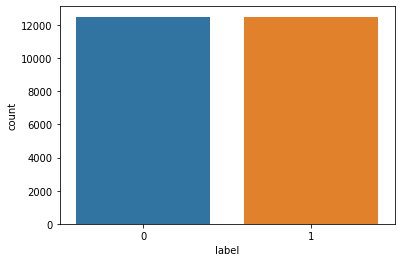

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

create data generator

In [ ]:
df['label']=df['label'].astype('str')

In [ ]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


model creation

In [ ]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

models=Sequential([
                Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
                MaxPool2D((2,2)),
                Conv2D(32,(3,3),activation='relu'),
                MaxPool2D((2,2)),
                Conv2D(64,(3,3),activation='relu'),
                MaxPool2D((2,2)),
                Flatten(),
                Dense(512,activation='relu'),
                Dense(1,activation='sigmoid')

])

In [ ]:
models.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
models.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)      

In [ ]:
history = models.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 147s 3s/step - loss: 0.6916 - accuracy: 0.5465 - val_loss: 0.6557 - val_accuracy: 0.6112
Epoch 2/10
40/40 [==============================] - 123s 3s/step - loss: 0.6241 - accuracy: 0.6529 - val_loss: 0.6186 - val_accuracy: 0.6750
Epoch 3/10
40/40 [==============================] - 122s 3s/step - loss: 0.5787 - accuracy: 0.6978 - val_loss: 0.5496 - val_accuracy: 0.7202
Epoch 4/10
40/40 [==============================] - 122s 3s/step - loss: 0.5481 - accuracy: 0.7224 - val_loss: 0.5616 - val_accuracy: 0.6998
Epoch 5/10
40/40 [==============================] - 122s 3s/step - loss: 0.5146 - accuracy: 0.7478 - val_loss: 0.5093 - val_accuracy: 0.7510
Epoch 6/10
40/40 [==============================] - 121s 3s/step - loss: 0.4887 - accuracy: 0.7649 - val_loss: 0.4549 - val_accuracy: 0.7824
Epoch 7/10
40/40 [==============================] - 121s 3s/step - loss: 0.4757 - accuracy: 0.7720 - val_loss: 0.4628 - val_accuracy: 0.7868
Epoch 8/10
40

Visualization of Results

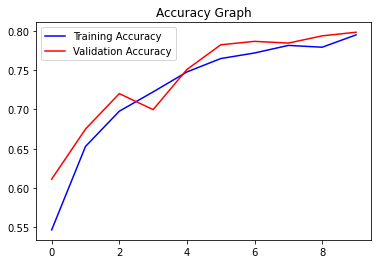

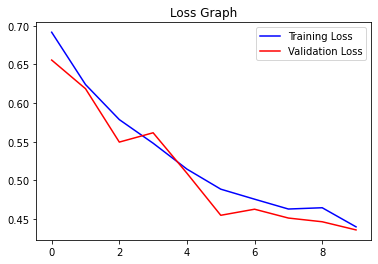

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()